<a href="https://colab.research.google.com/github/ali-kin4/JupyterNotes-1/blob/main/FBProphet_prediction_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [ ]:
!pip install yfinance

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from fbprophet import Prophet
sns.set()

In [6]:
name = "HiWeb"

## Make it a Function

In [43]:
def make_forecast_by_file(filename, periods, name, hist='max'):
  """
  forecast the given ticker (stock) period days into the future (from today)

  inputs
  ------
  > ticker
      >> ticker of stock to forecast
  > periods
      >> number of days into the future to forecast (from today's date)
  > hist
      >> amount of historical data to consider
          > default: max
          > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
  """

  hist_data = pd.read_csv(filename)

  hist_data['Date'] = pd.to_datetime(hist_data['Date'], format='%Y%m%d')

  hist_data.set_index("Date", inplace = True)

  # create new dataframe to hold dates (ds) & adjusted closing prices (y)
  df = pd.DataFrame()

  df['ds'] = hist_data.index.values
  df['y'] = hist_data['<CLOSE>'].values

  # create a Prophet model from that data
  m = Prophet(daily_seasonality=False)
  m.fit(df)

  future = m.make_future_dataframe(periods, freq='D')

  forecast = m.predict(future)

  m.plot(forecast)
  plt.title("{} Price Prediction".format(name))
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.savefig("{}.png".format(name), dpi = 600)

  return forecast

In [11]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-12-19,942.686161,-9827.467151,8559.146531,942.686161,942.686161,-1163.155407,-1163.155407,-1163.155407,-65.262751,-65.262751,-65.262751,-1097.892656,-1097.892656,-1097.892656,0.0,0.0,0.0,-220.469246
1,2012-12-22,946.499952,-9477.676703,9133.095941,946.499952,946.499952,-1051.202346,-1051.202346,-1051.202346,77.044286,77.044286,77.044286,-1128.246632,-1128.246632,-1128.246632,0.0,0.0,0.0,-104.702394
2,2012-12-23,947.771215,-9900.666923,9166.416777,947.771215,947.771215,-1040.945495,-1040.945495,-1040.945495,73.405216,73.405216,73.405216,-1114.350711,-1114.350711,-1114.350711,0.0,0.0,0.0,-93.174279
3,2012-12-24,949.042479,-9267.044036,9078.184502,949.042479,949.042479,-1058.212593,-1058.212593,-1058.212593,30.581266,30.581266,30.581266,-1088.793859,-1088.793859,-1088.793859,0.0,0.0,0.0,-109.170114
4,2012-12-25,950.313743,-10346.889422,8588.683655,950.313743,950.313743,-1222.937993,-1222.937993,-1222.937993,-170.622623,-170.622623,-170.622623,-1052.315370,-1052.315370,-1052.315370,0.0,0.0,0.0,-272.624250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,2021-10-14,5091.736222,-5873.252645,13562.744172,4546.502180,5641.837964,-1326.882237,-1326.882237,-1326.882237,27.427302,27.427302,27.427302,-1354.309539,-1354.309539,-1354.309539,0.0,0.0,0.0,3764.853985
1895,2021-10-15,5069.324492,-5973.572144,13422.000408,4521.811800,5621.718563,-1293.405347,-1293.405347,-1293.405347,27.427303,27.427303,27.427303,-1320.832650,-1320.832650,-1320.832650,0.0,0.0,0.0,3775.919145
1896,2021-10-16,5046.912762,-5818.734967,13596.078625,4496.465039,5600.803329,-1194.110340,-1194.110340,-1194.110340,77.044286,77.044286,77.044286,-1271.154626,-1271.154626,-1271.154626,0.0,0.0,0.0,3852.802422
1897,2021-10-17,5024.501032,-5034.806884,13401.540263,4469.610234,5581.805641,-1134.320255,-1134.320255,-1134.320255,73.405216,73.405216,73.405216,-1207.725471,-1207.725471,-1207.725471,0.0,0.0,0.0,3890.180777


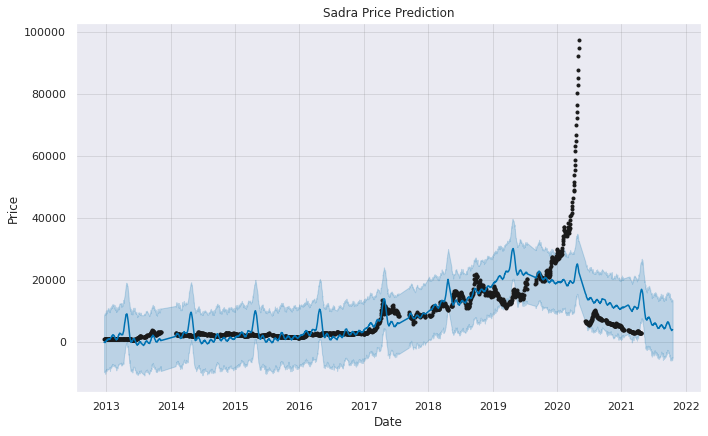

In [44]:
make_forecast_by_file('/content/SADRA.csv', 180, 'Sadra')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-05,15.318792,14.020322,16.051566,15.318792,15.318792,-0.298613,-0.298613,-0.298613,-0.057340,-0.057340,-0.057340,-0.241273,-0.241273,-0.241273,0.0,0.0,0.0,15.020179
1,2017-05-08,15.314102,14.076751,16.020386,15.314102,15.314102,-0.243114,-0.243114,-0.243114,-0.051666,-0.051666,-0.051666,-0.191448,-0.191448,-0.191448,0.0,0.0,0.0,15.070988
2,2017-05-09,15.312539,14.045726,16.081812,15.312539,15.312539,-0.209539,-0.209539,-0.209539,-0.040723,-0.040723,-0.040723,-0.168817,-0.168817,-0.168817,0.0,0.0,0.0,15.103000
3,2017-05-10,15.310976,14.124021,16.087476,15.310976,15.310976,-0.208817,-0.208817,-0.208817,-0.064893,-0.064893,-0.064893,-0.143924,-0.143924,-0.143924,0.0,0.0,0.0,15.102158
4,2017-05-11,15.309413,14.113635,16.176072,15.309413,15.309413,-0.176281,-0.176281,-0.176281,-0.059010,-0.059010,-0.059010,-0.117271,-0.117271,-0.117271,0.0,0.0,0.0,15.133132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,2021-10-16,21.674024,20.385409,23.119781,20.763481,22.553648,0.081419,0.081419,0.081419,0.136816,0.136816,0.136816,-0.055397,-0.055397,-0.055397,0.0,0.0,0.0,21.755444
1175,2021-10-17,21.687936,20.469989,23.120178,20.769586,22.577962,0.071121,0.071121,0.071121,0.136816,0.136816,0.136816,-0.065695,-0.065695,-0.065695,0.0,0.0,0.0,21.759058
1176,2021-10-18,21.701848,20.176349,22.875344,20.773064,22.600139,-0.128808,-0.128808,-0.128808,-0.051666,-0.051666,-0.051666,-0.077141,-0.077141,-0.077141,0.0,0.0,0.0,21.573040
1177,2021-10-19,21.715760,20.087436,22.898762,20.775889,22.624756,-0.130230,-0.130230,-0.130230,-0.040723,-0.040723,-0.040723,-0.089508,-0.089508,-0.089508,0.0,0.0,0.0,21.585529


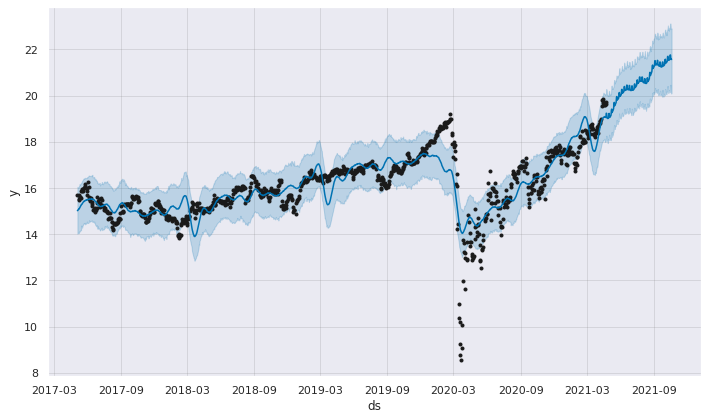

In [ ]:
# kkr real estate finance trust
make_forecast('KREF', 180)

In [24]:
df = pd.read_csv('/content/SADRA.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [ ]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

In [ ]:
n = 365  # set variable for number of days to predict
 
# snapchat
snap_forecast = make_forecast('SNAP', n)
 
# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)
 
snap_forecast